In [297]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [298]:
# Importing dataset
df = pd.read_csv('PPP_Country_Cleaned.csv')
df.head()

,Unnamed: 0,Country Name,Country Code,1990,2000,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,35,Canada,CAN,1.241934,1.227543,1.239904,1.244607,1.224000,1.230358,1.248004,1.206834,1.204736,1.198346,1.193783,..
1,41,China,CHN,1.692432,2.719407,3.524468,3.560968,3.663645,3.758850,3.870697,3.988837,4.183811,4.230337,4.223606,..
2,89,India,IND,5.489942,9.664333,15.549549,16.160835,17.342325,18.386549,19.235003,19.898727,20.647793,21.090736,21.208322,..
3,98,Japan,JPN,187.710516,154.717851,107.454281,104.273972,101.302673,103.052076,103.449739,105.502599,105.378962,104.609975,101.473948,..
4,188,Switzerland,CHE,1.935157,1.788217,1.397498,1.354072,1.312477,1.281761,1.235456,1.202086,1.179916,1.167667,1.147826,..


In [299]:
# Replacing 2020 column value with 0.
df["2020"]=df["2020"].replace(['..'], '0')
df

,Unnamed: 0,Country Name,Country Code,1990,2000,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,35,Canada,CAN,1.241934,1.227543,1.239904,1.244607,1.224000,1.230358,1.248004,1.206834,1.204736,1.198346,1.193783,0
1,41,China,CHN,1.692432,2.719407,3.524468,3.560968,3.663645,3.758850,3.870697,3.988837,4.183811,4.230337,4.223606,0
2,89,India,IND,5.489942,9.664333,15.549549,16.160835,17.342325,18.386549,19.235003,19.898727,20.647793,21.090736,21.208322,0
3,98,Japan,JPN,187.710516,154.717851,107.454281,104.273972,101.302673,103.052076,103.449739,105.502599,105.378962,104.609975,101.473948,0
4,188,Switzerland,CHE,1.935157,1.788217,1.397498,1.354072,1.312477,1.281761,1.235456,1.202086,1.179916,1.167667,1.147826,0
5,205,United Kingdom,GBR,0.639431,0.704348,0.706052,0.701634,0.695248,0.698444,0.692365,0.688672,0.682132,0.687119,0.680356,0


In [300]:
# Checking row and column
df.shape

(6, 15)

Our dataset has 6 rows and 15 column.

In [301]:
# Datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6 non-null      int64  
 1   Country Name  6 non-null      object 
 2   Country Code  6 non-null      object 
 3   1990          6 non-null      float64
 4   2000          6 non-null      float64
 5   2011          6 non-null      float64
 6   2012          6 non-null      float64
 7   2013          6 non-null      float64
 8   2014          6 non-null      float64
 9   2015          6 non-null      float64
 10  2016          6 non-null      float64
 11  2017          6 non-null      float64
 12  2018          6 non-null      float64
 13  2019          6 non-null      float64
 14  2020          6 non-null      object 
dtypes: float64(11), int64(1), object(3)
memory usage: 848.0+ bytes


In [302]:
# Droping Unnamed and Country Code column as they are not required.
df1=df.drop(['Unnamed: 0', 'Country Code'], axis=1)

In [303]:
# Checking Outlier
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,1990,2000,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,33.118235,28.470283,21.645292,21.216015,20.923395,21.401340,21.621877,22.081293,22.212892,22.164030,21.654640
std,75.753591,61.935881,42.411106,41.109788,39.883289,40.564677,40.707115,41.522388,41.452129,41.138226,39.885483
min,0.639431,0.704348,0.706052,0.701634,0.695248,0.698444,0.692365,0.688672,0.682132,0.687119,0.680356
25%,1.354558,1.367711,1.279303,1.271973,1.246119,1.243209,1.238593,1.203273,1.186121,1.175337,1.159315
50%,1.813794,2.253812,2.460983,2.457520,2.488061,2.520305,2.559351,2.597836,2.694274,2.714341,2.708694
75%,4.601246,7.928102,12.543279,13.010868,13.922655,14.729624,15.393926,15.921255,16.531797,16.875636,16.962143
90%,96.600229,82.191092,61.501915,60.217404,59.322499,60.719312,61.342371,62.700663,63.013377,62.850355,61.341135
95%,142.155372,118.454472,84.478098,82.245688,80.312586,81.885694,82.396055,84.101631,84.196170,83.730165,81.407542
99%,178.599487,147.465175,102.859044,99.868315,97.104656,98.818800,99.239002,101.222405,101.142404,100.434013,97.460667


There are no outliers in our dataset.

#### Scatter plot

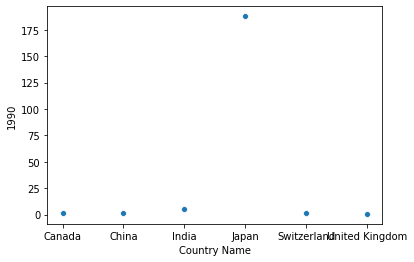

In [304]:
# Creating a scatter plot to observe the distribution
sns.scatterplot(y = '1990', x = 'Country Name', data = df1)
plt.show()

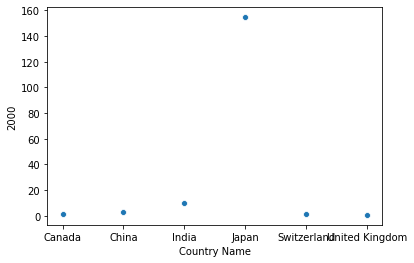

In [305]:
sns.scatterplot(y = '2000', x = 'Country Name', data = df1)
plt.show()

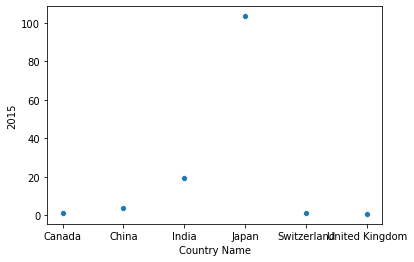

In [306]:
sns.scatterplot(y = '2015', x = 'Country Name', data = df1)
plt.show()

As per our Dataset Japan has higher no. in all the years.

#### Pie Plot

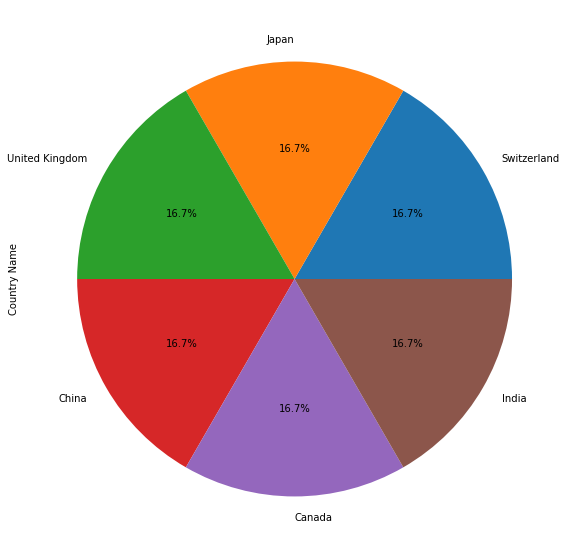

In [307]:
plt.figure(figsize=(12,10))
df1['Country Name'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

All the country has equal percentage as per this.

#### Count Plot

<AxesSubplot:xlabel='Country Name', ylabel='count'>

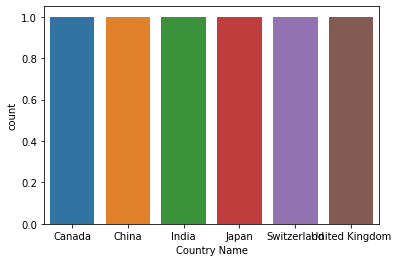

In [308]:
sns.countplot(x= df1['Country Name'])

##### Correlation

<AxesSubplot:>

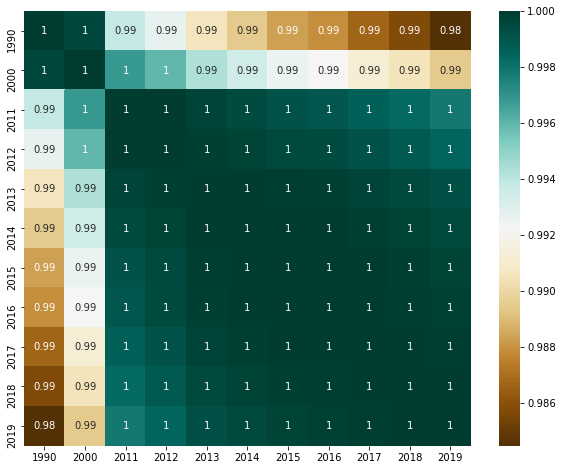

In [309]:
# Finding the relations between the variables.
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),cmap="BrBG",annot=True)

As per our data most of the years data is highily correlated.

In [310]:
# Renaming the column
df1=df1.rename(columns={'Country Name':'S No'})

In [311]:
# Transpose the data set for more observation
df1=df1.T
df1

,0,1,2,3,4,5
S No,Canada,China,India,Japan,Switzerland,United Kingdom
1990,1.24193,1.69243,5.48994,187.711,1.93516,0.639431
2000,1.22754,2.71941,9.66433,154.718,1.78822,0.704348
2011,1.2399,3.52447,15.5495,107.454,1.3975,0.706052
2012,1.24461,3.56097,16.1608,104.274,1.35407,0.701634
2013,1.224,3.66364,17.3423,101.303,1.31248,0.695248
2014,1.23036,3.75885,18.3865,103.052,1.28176,0.698444
2015,1.248,3.8707,19.235,103.45,1.23546,0.692365
2016,1.20683,3.98884,19.8987,105.503,1.20209,0.688672
2017,1.20474,4.18381,20.6478,105.379,1.17992,0.682132


In [312]:
new_df=df1.iloc[0]
df1.columns=new_df

In [313]:
# Freeze the Data frame
df2=df1[1:]

In [314]:
# Reset the index and renaming the coulmns as required
df2.reset_index(inplace=True)
df2=df2.rename(columns = {"index": "Date",'United Kingdom' : 'United_Kingdom'}) 
df2

S No,Date,Canada,China,India,Japan,Switzerland,United_Kingdom
0,1990,1.24193,1.69243,5.48994,187.711,1.93516,0.639431
1,2000,1.22754,2.71941,9.66433,154.718,1.78822,0.704348
2,2011,1.2399,3.52447,15.5495,107.454,1.3975,0.706052
3,2012,1.24461,3.56097,16.1608,104.274,1.35407,0.701634
4,2013,1.224,3.66364,17.3423,101.303,1.31248,0.695248
5,2014,1.23036,3.75885,18.3865,103.052,1.28176,0.698444
6,2015,1.248,3.8707,19.235,103.45,1.23546,0.692365
7,2016,1.20683,3.98884,19.8987,105.503,1.20209,0.688672
8,2017,1.20474,4.18381,20.6478,105.379,1.17992,0.682132
9,2018,1.19835,4.23034,21.0907,104.61,1.16767,0.687119


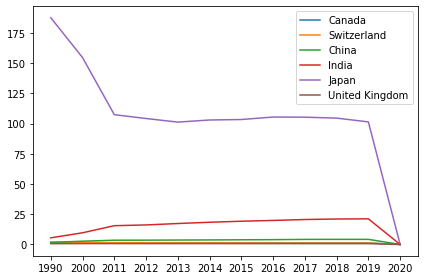

In [315]:
fig = plt.figure(figsize=(6,4))
plt.plot(df2.Date,df2.Canada,label="Canada")
plt.plot(df2.Date,df2.Switzerland,label="Switzerland")
plt.plot(df2.Date,df2.China,label="China")
plt.plot(df2.Date,df2.India,label="India")
plt.plot(df2.Date,df2.Japan,label="Japan")
plt.plot(df2.Date,df2['United_Kingdom'],label="United Kingdom")
plt.legend()
plt.tight_layout()

As per this Japan PPP is decreased till 2011 and then its almost same till 2019 and for India its increased slightly after 2011.

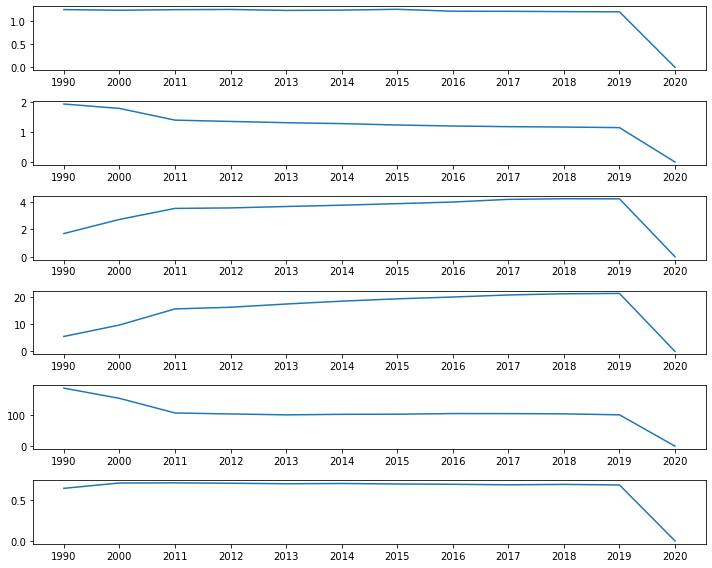

In [316]:
# Plotting the countrywise data
fig, ax = plt.subplots(6,1,figsize=(10,8))
ax[0].plot(df2.Date,df2.Canada)
ax[1].plot(df2.Date,df2.Switzerland)
ax[2].plot(df2.Date,df2.China)
ax[3].plot(df2.Date,df2.India)
ax[4].plot(df2.Date,df2.Japan)
ax[5].plot(df2.Date,df2.United_Kingdom)

plt.tight_layout()

For Canada and United Kingdom Values are same till last, Switzerland and Japan its values decreased from 1990 to 2011 then its
same all the years, China and India values incresed till 2011 then its almost same till 2019.

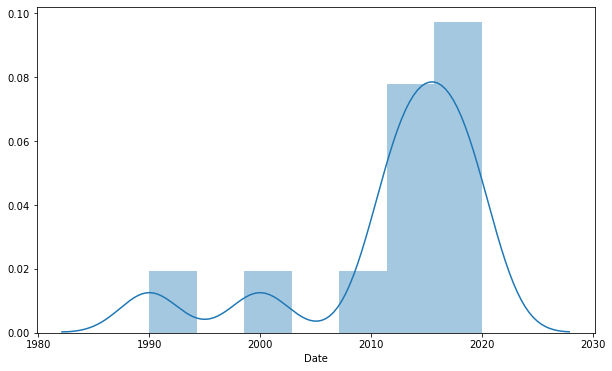

In [317]:
# Have look at Date variable
plt.figure(figsize=(10,6))
sns.distplot(df2.Date)
plt.show()

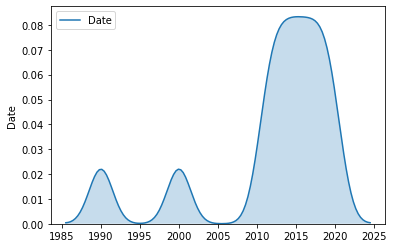

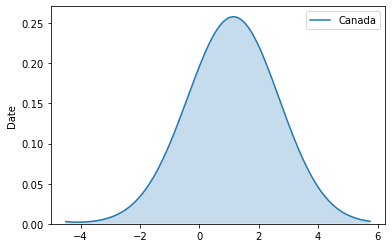

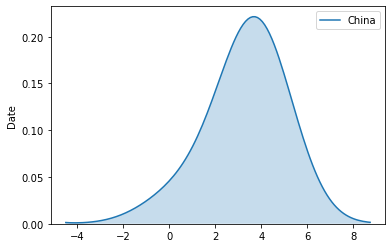

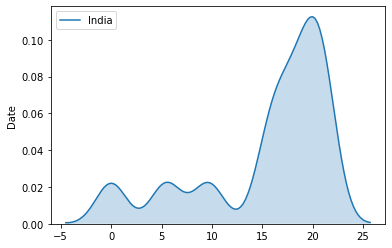

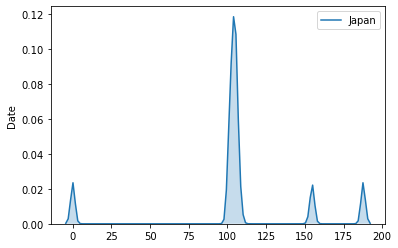

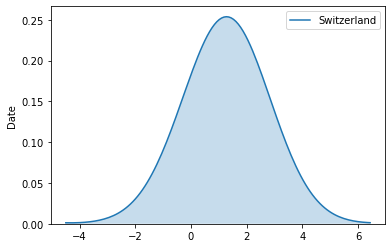

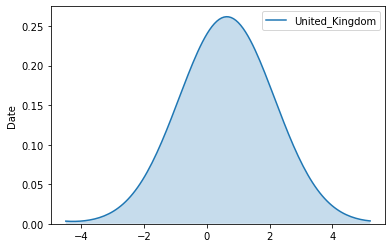

In [318]:
# plotting distribution plot for all the numeric varibales and seeing freqency and Skweness

plt.figure()
for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.kdeplot(df2[col],bw=1.5, shade = True)
    plt.ylabel('Date')

Data is normaly distributed except India and Japan, their data is left skewed.

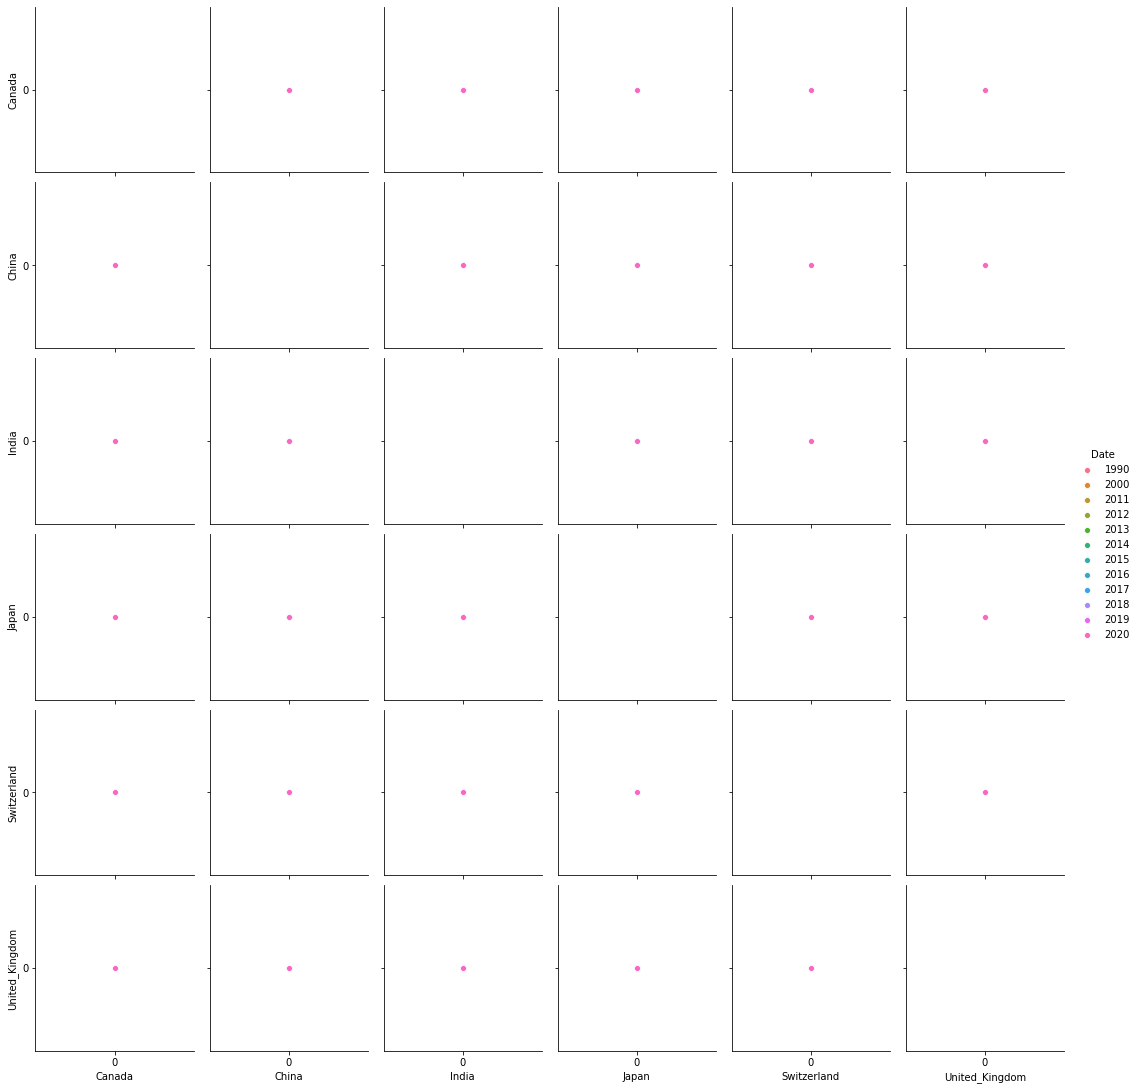

In [319]:
# Visualise Data
sns.pairplot(df2, hue='Date')